## Polynomial Regression

**Polynomial Regression** is similar to **Linear Regression**, but with the addition of polynomial features to the dataset. For instance, if we have two features \( x_1 \) and \( x_2 \), we will add \( x_1^2 \), \( x_2^2 \), \( x_1 x_2 \), \( x_1^3 \), \( x_2^3 \), and so on. Adding these features allows us to achieve a non-linear fit, i.e., a boundary that is not a simple straight line.


In [2]:
# Import necessary libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize 

# Load the dataset
df = pd.read_csv('ex2data2.csv', header=None)

# Rename the columns for better readability
df.rename(columns={0: 'chip1', 1: 'chip2', 2: 'y'}, inplace=True)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())


First few rows of the dataframe:
      chip1    chip2  y
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1


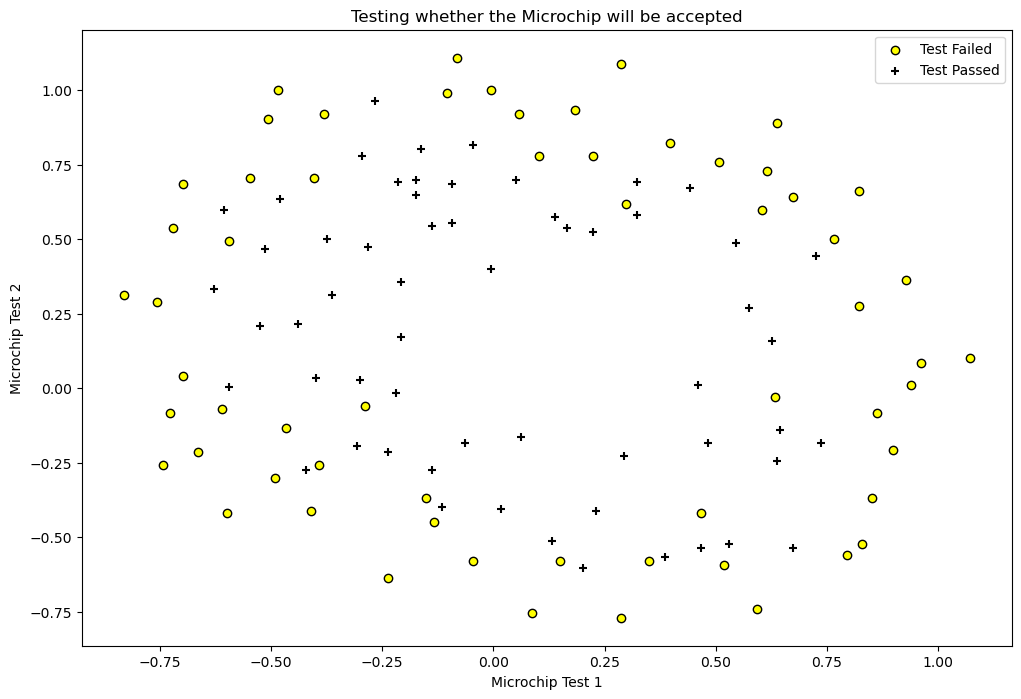

In [5]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 8))

# Plot the data points where the test failed
plt.scatter(df[df['y'] == 0]['chip1'], df[df['y'] == 0]['chip2'],
            label='Test Failed', color='yellow', edgecolor='black')

# Plot the data points where the test passed
plt.scatter(df[df['y'] == 1]['chip1'], df[df['y'] == 1]['chip2'],
            label='Test Passed', marker='+', color='black')

# Set the labels for the x and y axes
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Add a legend to the plot
plt.legend(loc='upper right')

# Set the title of the plot
plt.title('Testing whether the Microchip will be accepted')

# Display the plot
plt.show()


In [7]:
import numpy as np
from scipy.optimize import minimize

class LogisticRegression(object):
    def __init__(self, X, y, alpha=0.001, n_iterations=5000, lambda_param=0, verbose=True):
        self.y = self._handle_data_type(y)
        self.X = self._handle_data_type(X)
        self.X = self._hstack_one(self.X)
        self.thetas = np.zeros(self.X.shape[1])
        self.n_rows = self.X.shape[0]
        self.n_features = self.thetas.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.lambda_param = lambda_param
        if verbose:
            print(f"Number of features: {self.n_features - 1}")
            print(f"Cost before fitting: {self.cost():.4f}")

    @staticmethod
    def _handle_data_type(data):
        """Ensure the data is in the correct format."""
        return np.array(data)

    @staticmethod
    def _hstack_one(input_matrix):
        """Add a column of ones to the input matrix for the intercept term."""
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack((np.ones((input_matrix.shape[0], 1)), input_matrix))

    @staticmethod
    def sigmoid(z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def cost(self, thetas=None):
        """Compute the cost function with regularization."""
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        cost = -(1 / self.n_rows) * (np.sum(np.log(self.sigmoid(dot_prod_pos))) +
                                     np.sum(np.log(1 - self.sigmoid(dot_prod_neg)))) + \
               (self.lambda_param / (2 * self.n_rows)) * np.sum(thetas[1:] ** 2)
        return cost

    def predict(self, new_X, threshold=0.5):
        """Predict the class labels for new data."""
        new_X = self._handle_data_type(new_X)
        assert new_X.shape[1] == self.X.shape[1] - 1, \
            f"Number of features don't match. {new_X.shape[1]} != {self.X.shape[1] - 1}"
        new_X = self._hstack_one(new_X)
        h = new_X.dot(self.thetas)
        return self.sigmoid(h) >= threshold

    def batch_gradient(self, thetas=None):
        """Compute the gradient of the cost function."""
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        gradient = self.X.T.dot(h) / self.n_rows
        reg = thetas * self.lambda_param / self.n_rows
        reg[0] = 0  # Don't regularize the intercept term
        return gradient + reg

    def batch_gradient_descent(self):
        """Perform batch gradient descent to minimize the cost function."""
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas -= alpha_by_m * self.batch_gradient()
            cost = self.cost()
            print(f"\rIteration: {i + 1} Loss: {cost:.5f}", end="")
        print()

    def scipy_optimize(self, verbose=True):
        """Optimize the cost function using scipy's minimize function."""
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient, options={'maxiter': self.n_iterations})
        if verbose:
            print(result)
        self.thetas = result.x


In [10]:
# Initialize the Logistic Regression model with the dataset
simple_lr = LogisticRegression(df[['chip1', 'chip2']].values, df['y'].values, n_iterations=20000)

# Optimize the model parameters using scipy's minimize function
simple_lr.scipy_optimize()

# Display the optimized parameters
print("Optimized parameters:")
print(simple_lr.thetas)


Number of features: 2
Cost before fitting: 0.6931
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.6902411220334614
        x: [-1.418e-02 -3.035e-01 -1.815e-02]
      nit: 14
      jac: [-5.976e-07 -1.619e-07 -1.521e-06]
 hess_inv: [[ 4.231e+00 -7.179e-01 -2.701e+00]
            [-7.179e-01  1.597e+01  1.716e+00]
            [-2.701e+00  1.716e+00  1.367e+01]]
     nfev: 15
     njev: 15
Optimized parameters:
[-0.01418223 -0.30352647 -0.01815365]
